# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [3]:
df.shape

(699, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [6]:
data = df.drop(['ID', 'Class'], axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
data.shape

(699, 9)

In [8]:
data.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [11]:
data.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
dtype: int64

In [12]:
print("\nNo Null values present in the dataset\n")


No Null values present in the dataset



In [13]:
data.duplicated().sum()

236

In [14]:
data.drop_duplicates(keep='first', inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [17]:
(data['Bare Nuclei'] == '?').sum()

14

In [18]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [19]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [20]:
data['Bare Nuclei'].value_counts()

1     172
10    130
2      30
5      29
3      28
8      20
4      19
?      14
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [21]:
data['Bare Nuclei'].replace('?', 1, inplace=True)

In [22]:
(data['Bare Nuclei'] == '?').sum()

0

In [23]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')

In [24]:
data.shape

(463, 9)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null int32
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
dtypes: int32(1), int64(8)
memory usage: 34.4 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [26]:
# Check for correlation of variable

In [27]:
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.578156,0.588956,0.383573,0.432165,0.511254,0.496158,0.450853,0.296797
Cell Size,0.578156,1.000000,0.877404,0.640096,0.689982,0.589270,0.712986,0.657170,0.403911
Cell Shape,0.588956,0.877404,1.000000,0.612415,0.649388,0.614430,0.687331,0.654724,0.381645
Marginal Adhesion,0.383573,0.640096,0.612415,1.000000,0.528163,0.591222,0.611294,0.514134,0.358434
Single Epithelial Cell Size,0.432165,0.689982,0.649388,0.528163,1.000000,0.483106,0.554625,0.558757,0.434875
Bare Nuclei,0.511254,0.589270,0.614430,0.591222,0.483106,1.000000,0.603506,0.471511,0.267145
Normal Nucleoli,0.496158,0.712986,0.687331,0.611294,0.554625,0.603506,1.000000,0.607259,0.279795
Bland Chromatin,0.450853,0.657170,0.654724,0.514134,0.558757,0.471511,0.607259,1.000000,0.369716
Mitoses,0.296797,0.403911,0.381645,0.358434,0.434875,0.267145,0.279795,0.369716,1.000000


In [28]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

### Observations:
- Cell Size shows high correlation of 0.90 with Cell Shape, correlation
- Marginal Adhesion and Cell Size have a correlation pf 0.64
- All other columns show either marginal or a low correlation
- No Negative correlation is seen

In [29]:
#Let us check for pair plots

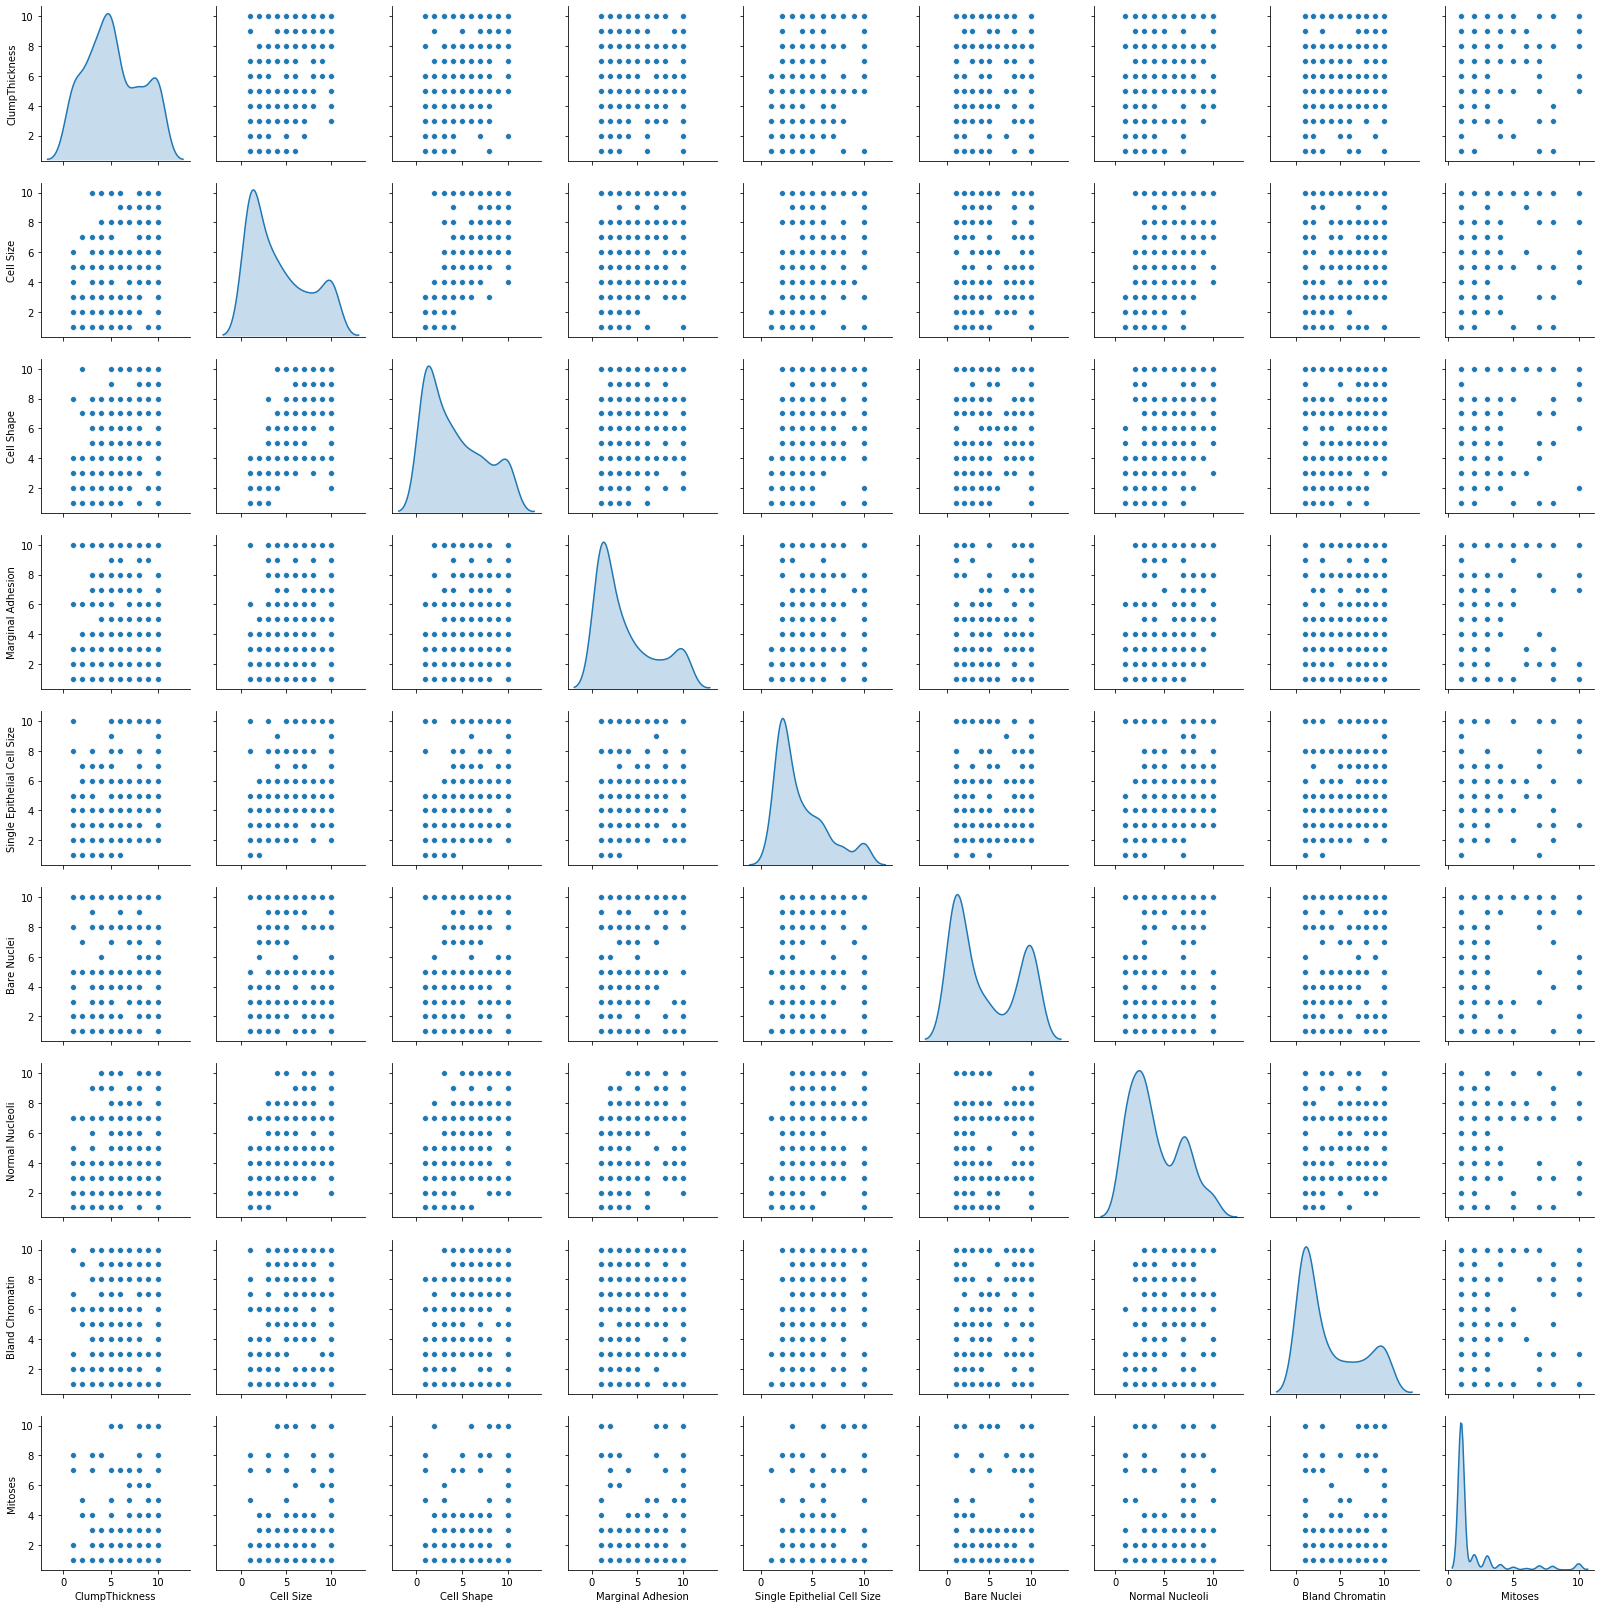

In [30]:
ax = sns.pairplot(data, diag_kind='kde')

In [31]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

### Observations
- The diagnol KDE plots show that two good clusters exist in the dataset
- So, we can get two classses from the dataset.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [32]:
# We could see most of the outliers are now removed.

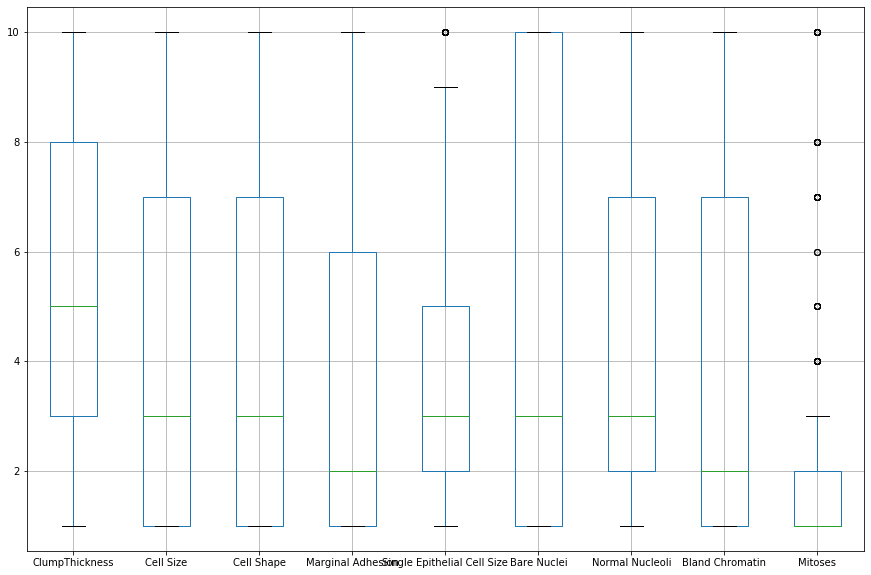

In [33]:
data.boxplot(figsize=(15,10))

In [34]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [35]:
drop_numerical_outliers(data)

In [36]:
data.shape

(449, 9)

In [37]:
from scipy.stats import zscore
data_z = data.apply(zscore)

In [38]:
data_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.081374,-0.958732,-1.022955,-0.841550,-0.733457,-0.939807,-0.426863,-0.806471,-0.428494
1,-0.081374,-0.011254,-0.039429,0.460279,1.416165,1.387251,-0.426863,-0.503707,-0.428494
2,-0.784004,-0.958732,-1.022955,-0.841550,-0.733457,-0.681245,-0.426863,-0.806471,-0.428494
3,0.269942,1.252050,1.271940,-0.841550,-0.303532,-0.164121,-0.426863,1.010112,-0.428494
4,-0.432689,-0.958732,-1.022955,-0.190635,-0.733457,-0.939807,-0.426863,-0.806471,-0.428494


# Q6 Create a covariance matrix for identifying Principal components

In [39]:
# PCA
# Step 1 - Create covariance matrix


In [40]:
covariance_matrix = data_z.cov()
covariance_matrix

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.002232,0.575649,0.583719,0.374172,0.420945,0.511968,0.506681,0.443263,0.243424
Cell Size,0.575649,1.002232,0.881272,0.632244,0.670027,0.599120,0.720385,0.638264,0.339977
Cell Shape,0.583719,0.881272,1.002232,0.602173,0.637999,0.619432,0.700089,0.643888,0.335047
Marginal Adhesion,0.374172,0.632244,0.602173,1.002232,0.517936,0.604283,0.606285,0.504879,0.330053
Single Epithelial Cell Size,0.420945,0.670027,0.637999,0.517936,1.002232,0.496206,0.560335,0.524035,0.325375
Bare Nuclei,0.511968,0.599120,0.619432,0.604283,0.496206,1.002232,0.617333,0.466353,0.299389
Normal Nucleoli,0.506681,0.720385,0.700089,0.606285,0.560335,0.617333,1.002232,0.607689,0.284099
Bland Chromatin,0.443263,0.638264,0.643888,0.504879,0.524035,0.466353,0.607689,1.002232,0.300566
Mitoses,0.243424,0.339977,0.335047,0.330053,0.325375,0.299389,0.284099,0.300566,1.002232


# Q7 Identify eigen values and eigen vector

In [41]:
# Step 2- Get eigen values and eigen vector

In [42]:
eigvals, eigvecs = np.linalg.eig(covariance_matrix)

In [43]:
print(eigvals)

[5.28495567 0.84016097 0.11646101 0.64399567 0.59909523 0.48638237
 0.31620325 0.35657308 0.37626203]


In [44]:
print(eigvecs)

[[ 2.95032320e-01  1.99505368e-01 -6.55380558e-03  8.29720855e-01
   6.85067672e-02  2.80989589e-02 -2.03972958e-01 -3.70817952e-01
  -8.95767087e-03]
 [ 3.92365756e-01  9.63484311e-02  7.29312002e-01 -2.01738563e-02
  -1.77930674e-01  1.10472591e-01  2.58958096e-01  1.28878754e-01
   4.20631152e-01]
 [ 3.88911321e-01  1.07763153e-01 -6.72189634e-01  3.36715796e-02
  -1.62803165e-01  5.88199449e-02  4.15077616e-01  1.91483095e-01
   3.81107004e-01]
 [ 3.30611317e-01 -6.67084978e-02 -5.88226863e-02 -4.45026164e-01
   4.41079601e-01 -7.48209424e-02 -1.09152068e-01 -6.37908417e-01
   2.56411833e-01]
 [ 3.29625065e-01 -4.10830217e-02 -5.45377162e-02 -2.08711637e-01
  -3.41928499e-01  7.21266134e-01 -1.86605585e-01 -1.22204729e-01
  -3.95258165e-01]
 [ 3.33158058e-01  6.00721018e-02  7.39354839e-02  3.33417270e-02
   6.34979371e-01  3.49851295e-02  3.54108530e-01  3.08041370e-01
  -5.04097042e-01]
 [ 3.62252603e-01  1.42671518e-01 -5.72225370e-02 -1.17599950e-01
   6.56571018e-02 -2.1280968

# Q8 Find variance and cumulative variance by each eigen vector

In [45]:
total_eigenval = sum(eigvals)
var_exp = [i/total_eigenval * 100 for i in sorted(eigvals, reverse=True)]
print(var_exp)
cum_var = np.cumsum(var_exp)
print(cum_var)

[58.59094626858744, 9.314330982199916, 7.139570913162204, 6.641788298285929, 5.392212366093072, 4.17137807478958, 3.9530992626152597, 3.5055445684631703, 1.2911292658034295]
[ 58.59094627  67.90527725  75.04484816  81.68663646  87.07884883
  91.2502269   95.20332617  98.70887073 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA()

In [48]:
pca.fit(data_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
pca_components = pca.components_
pca_components

array([[ 2.95032320e-01,  3.92365756e-01,  3.88911321e-01,
         3.30611317e-01,  3.29625065e-01,  3.33158058e-01,
         3.62252603e-01,  3.28451864e-01,  1.99235127e-01],
       [-1.99505368e-01, -9.63484311e-02, -1.07763153e-01,
         6.67084978e-02,  4.10830217e-02, -6.00721018e-02,
        -1.42671518e-01, -4.59110784e-02,  9.52413884e-01],
       [-8.29720855e-01,  2.01738563e-02, -3.36715796e-02,
         4.45026164e-01,  2.08711637e-01, -3.33417270e-02,
         1.17599950e-01,  1.25563779e-01, -1.94180399e-01],
       [-6.85067672e-02,  1.77930674e-01,  1.62803165e-01,
        -4.41079601e-01,  3.41928499e-01, -6.34979371e-01,
        -6.56571018e-02,  4.66957365e-01,  1.08387017e-02],
       [ 2.80989589e-02,  1.10472591e-01,  5.88199449e-02,
        -7.48209424e-02,  7.21266134e-01,  3.49851295e-02,
        -2.12809684e-01, -6.38195800e-01, -6.25912029e-02],
       [ 8.95767087e-03, -4.20631152e-01, -3.81107004e-01,
        -2.56411833e-01,  3.95258165e-01,  5.040970

# Q10 Find correlation between components and features

In [50]:
pca.explained_variance_

array([5.28495567, 0.84016097, 0.64399567, 0.59909523, 0.48638237,
       0.37626203, 0.35657308, 0.31620325, 0.11646101])

In [51]:
#pca_components = np.cumsum(pca.explained_variance_ratio_)
#pca_components

In [52]:
corr_df = pd.DataFrame(data=pca_components, columns=list(data_z.columns))

In [53]:
corr_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.295032,0.392366,0.388911,0.330611,0.329625,0.333158,0.362253,0.328452,0.199235
1,-0.199505,-0.096348,-0.107763,0.066708,0.041083,-0.060072,-0.142672,-0.045911,0.952414
2,-0.829721,0.020174,-0.033672,0.445026,0.208712,-0.033342,0.117600,0.125564,-0.194180
3,-0.068507,0.177931,0.162803,-0.441080,0.341928,-0.634979,-0.065657,0.466957,0.010839
4,0.028099,0.110473,0.058820,-0.074821,0.721266,0.034985,-0.212810,-0.638196,-0.062591
5,0.008958,-0.420631,-0.381107,-0.256412,0.395258,0.504097,-0.101394,0.435113,-0.045306
6,0.370818,-0.128879,-0.191483,0.637908,0.122205,-0.308041,-0.495364,0.196925,-0.091120
7,0.203973,-0.258958,-0.415078,0.109152,0.186606,-0.354109,0.725292,-0.140544,0.033410
8,-0.006554,0.729312,-0.672190,-0.058823,-0.054538,0.073935,-0.057223,0.032351,0.000473


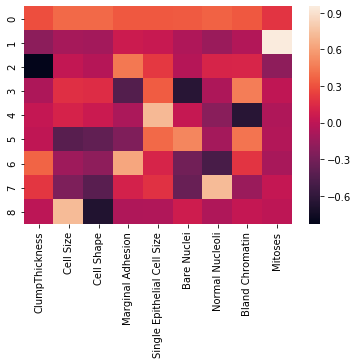

In [54]:
ax = sns.heatmap(corr_df)

### Conclusion
- We can infer that since 90% variance is being explained by 7 of the columns and the total number of columns is 9, we need not go for dimensionality reduction

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [55]:
jokes_df = pd.read_excel('jokes.xlsx')

In [56]:
jokes_df.head().T

,0,1,2,3,4
NumJokes,74.00,100.00,49.00,48.00,91.00
Joke1,-7.82,4.08,99.00,99.00,8.50
Joke2,8.79,-0.29,99.00,8.35,4.61
Joke3,-9.66,6.36,99.00,99.00,-4.17
Joke4,-8.16,4.37,99.00,99.00,-5.39
Joke5,-7.52,-2.38,9.03,1.80,1.36
Joke6,-8.50,-9.66,9.27,8.16,1.60
Joke7,-9.85,-0.73,9.03,-2.82,7.04
Joke8,4.17,-5.34,9.27,6.21,4.61
Joke9,-8.98,8.88,99.00,99.00,-0.44


# Q12 Create a new dataframe named `ratings`, with only first 200 rows and all columns from 1(first column is 0) of dataset

In [57]:
jokes_new = jokes_df.iloc[0:200,1:]

In [58]:
jokes_new.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [59]:
jokes_new = jokes_new.replace(99.00, 0)

# Q14 Normalize the ratings using StandardScaler and save them in ratings_diff variable

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(jokes_new)

In [61]:
scaler.mean_

array([ 0.53005,  0.5939 ,  0.23765, -0.701  , -0.0379 ,  1.32005,
        0.1715 , -0.0853 ,  0.0167 ,  0.8947 ,  1.16675,  1.34195,
       -1.3481 ,  1.9695 , -1.5763 , -2.8516 , -0.826  , -0.74145,
        0.304  , -0.82725,  2.56045,  0.93365,  0.34435, -1.09905,
        0.56475,  1.1568 ,  3.0524 ,  1.15585,  3.18995, -0.70215,
        2.6571 ,  2.77955, -0.03505,  1.16255,  3.22315,  3.6115 ,
       -0.62155,  0.82085,  0.9915 ,  0.6351 , -0.1377 ,  2.10995,
       -0.5273 , -1.31255,  0.51955,  1.8097 ,  1.45255,  1.39085,
        2.85   ,  4.0554 , -0.23595,  0.58525,  3.5715 ,  1.86345,
        1.0057 ,  2.35975, -0.9918 , -2.3475 , -0.00965, -0.12315,
        2.26565,  2.86185,  0.3942 , -0.95885,  2.53785,  2.29775,
       -0.0972 ,  2.2972 ,  2.6389 ,  0.56135, -0.1543 ,  1.121  ,
        0.361  , -0.40885, -0.14515,  0.67045,  0.21805,  0.72365,
        0.27445,  0.57735,  0.49335,  0.30125,  0.88235,  0.40525,
        0.42435,  0.24565,  0.6049 ,  0.8365 ,  1.44285, -0.34

In [62]:
scaler.var_

array([20.2183965 , 24.03942979, 19.89201498, 14.854762  , 29.37926959,
       19.2047845 , 31.51126875, 23.51747891, 16.22228711, 24.93516691,
       21.79390994, 19.8525047 , 28.06547039, 20.06560475, 26.75436631,
       25.47209044, 19.758696  , 24.1403314 , 22.886689  , 25.57952294,
       23.6365973 , 22.88761418, 22.16818158, 17.9476326 , 20.58218294,
       24.05705776, 19.98393424, 23.95842328, 24.0916295 , 18.64146888,
       23.55601059, 22.5206843 , 20.874247  , 21.548533  , 20.80480758,
       16.75258675, 19.9505421 , 24.58004578, 21.07206475, 20.05667799,
       22.13492371, 22.7506445 , 19.42951171, 18.463763  , 22.9199923 ,
       24.36906591, 22.427487  , 25.12794978, 19.202759  , 15.27404384,
       21.1946951 , 21.76825494, 19.93606175, 26.2519486 , 18.97523951,
       22.35577944, 21.68697976, 17.16941675, 18.88015138, 23.93887458,
       21.60061858, 22.43534108, 19.81705236, 16.90913418, 24.20981588,
       21.38699044, 18.73979316, 22.19372916, 22.45636479, 16.13

# Q15  Find the mean for each column  in `ratings_diff` i.e, for each joke


In [63]:
ratings_df = pd.DataFrame(ratings_diff, columns=list(jokes_new.columns))

In [64]:
ratings_df

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [65]:
ratings_df.shape

(200, 100)

In [66]:
ratings_df.describe()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.110223e-17,-9.658940e-17,-4.107825e-17,3.719247e-17,-8.881784e-18,-2.636780e-18,-1.665335e-18,2.331468e-17,-4.329870e-17,-2.553513e-17,...,-4.385381e-17,-3.497203e-17,8.770762e-17,-7.244205e-17,1.054712e-16,2.858824e-17,-2.137179e-17,1.198694e-16,1.840889e-16,7.549517e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,...,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-2.277344e+00,-2.150499e+00,-2.230392e+00,-2.350430e+00,-1.802882e+00,-2.548886e+00,-1.803067e+00,-2.013555e+00,-2.449717e+00,-2.133708e+00,...,-3.315734e+00,-3.091947e+00,-3.404882e+00,-2.942232e+00,-3.127874e+00,-3.338140e+00,-3.055176e+00,-2.795808e+00,-3.037688e+00,-3.095201e+00
25%,-3.074734e-01,-6.503974e-01,-2.163991e-01,-2.553067e-01,-7.715675e-01,-3.012213e-01,-8.286289e-01,-8.629168e-01,-1.164936e-01,-5.296272e-01,...,-1.924594e-01,-5.532901e-02,-3.621928e-01,-1.840428e-01,-1.759224e-01,-1.404012e-01,-2.333493e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
50%,-1.178809e-01,-1.211299e-01,-5.328420e-02,1.818801e-01,6.971984e-02,-3.012213e-01,1.208696e-01,1.578107e-01,-4.146297e-03,-4.299579e-02,...,-1.924594e-01,-5.532901e-02,-3.621928e-01,-1.840428e-01,-1.759224e-01,-1.404012e-01,-2.333493e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
75%,6.410449e-01,8.038136e-01,4.691319e-01,1.818801e-01,7.878582e-01,8.254634e-01,8.040453e-01,7.238505e-01,3.273092e-01,6.859500e-01,...,-1.924594e-01,-5.532901e-02,1.430941e-01,-1.292252e-01,-1.759224e-01,-1.404012e-01,-1.993514e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
max,1.943728e+00,1.769548e+00,2.025169e+00,2.472895e+00,1.708016e+00,1.814094e+00,1.620828e+00,1.929134e+00,2.237834e+00,1.687249e+00,...,2.913710e+00,2.813817e+00,2.511284e+00,2.435660e+00,2.585483e+00,2.959825e+00,2.600840e+00,2.615970e+00,2.715346e+00,2.595274e+00


In [67]:
mean_ratings_df = pd.DataFrame(ratings_df.describe().iloc[1,:])

# Q16 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [68]:
mean_ratings_df.iloc[:,0].argsort()[:-10:-1]

Joke100    98
Joke99     81
Joke98     97
Joke97     20
Joke96     94
Joke95     92
Joke94     47
Joke93     73
Joke92     99
Name: mean, dtype: int64